# Homework 1

## Housekeeping

In [1]:
import rpy2
%load_ext rpy2.ipython

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom

## Question 1
*Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.*

Run the grid approximation example from class notes as an example. Binomial density function in R:

*dbinom(x,size,prob)*,

where
 - *x* is count of successes (water observations)
 - *size* is number of tosses
 - *prob* is probabiluty of succes (water observation) 

Here we give an array of probablities *p_grid*, so that we get sampling for many possible probabilities. Prior *prior_prob* is a flat prior equal to 1. *prob_data* is the (posterior) probability that we get 6 successes on 9 trials, given that true probability is a value from *p_grid*.

In [3]:
%%R -o p_grid,prior_prob,prob_data,posterior
p_grid = seq(from=0, to=1, length.out=1000)
prior_prob = rep(1,1000)
prob_data = dbinom(6, size=9, prob=p_grid)
posterior = prob_data*prior_prob
posterior = posterior/sum(posterior)

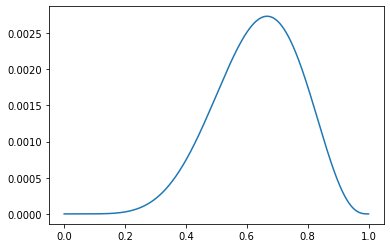

In [4]:
_ = plt.plot(list(p_grid), list(posterior))

Let's re-do this in Python and utilize that in solving the question. 

In [5]:
def SampleBinomialPosterior(k,n,prior,gridn):
    """
     k is count of successes (water observations)
     n is number of tosses
     prior is prior probability of succes
     gridn defines step count in probability grid
    """
    prob_grid = np.arange(0,1,1/gridn)
    prior_prob = np.repeat(prior,gridn)
    prob_data = binom.pmf(k, n, prob_grid)
    posterior = prob_data*prior_prob
    posterior = posterior/sum(posterior)
    return posterior, prob_grid

Repeat example from above

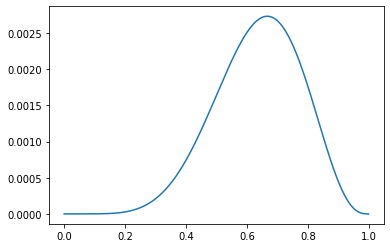

In [6]:
posterior, prob_grid = SampleBinomialPosterior(k=6, n=9, prior=1, gridn=1000)
_ = plt.plot(list(prob_grid), list(posterior))

Homework solution

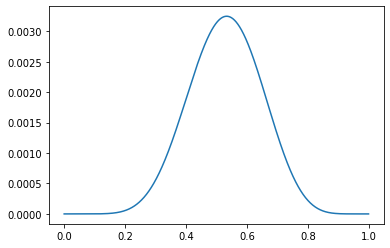

In [7]:
posterior, prob_grid = SampleBinomialPosterior(k=8, n=15, prior=1, gridn=1000)
_ = plt.plot(list(prob_grid), list(posterior))